In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

measure = pd.read_csv('./src/sg_measure.csv')
history = pd.read_csv('./src/sg_history.csv')

In [2]:
measure

,Unnamed: 0,powe,vibr
0,2021-07-09 06:00:00,0.000000,0.0
1,2021-07-09 06:00:01,0.000000,0.0
2,2021-07-09 06:00:02,0.147347,0.0
3,2021-07-09 06:00:03,0.248304,0.0
4,2021-07-09 06:00:04,0.000000,0.0
...,...,...,...
43196,2021-07-09 17:59:56,0.675477,0.0
43197,2021-07-09 17:59:57,0.083551,0.0
43198,2021-07-09 17:59:58,0.000000,0.0
43199,2021-07-09 17:59:59,0.702106,0.0


In [3]:
measure.rename(columns={'Unnamed: 0': 'time'}, inplace=True)

In [4]:
measure['time'] = pd.to_datetime(measure['time'])
measure.set_index('time', inplace=True)
measure

,powe,vibr
time,,
2021-07-09 06:00:00,0.000000,0.0
2021-07-09 06:00:01,0.000000,0.0
2021-07-09 06:00:02,0.147347,0.0
2021-07-09 06:00:03,0.248304,0.0
2021-07-09 06:00:04,0.000000,0.0
...,...,...
2021-07-09 17:59:56,0.675477,0.0
2021-07-09 17:59:57,0.083551,0.0
2021-07-09 17:59:58,0.000000,0.0


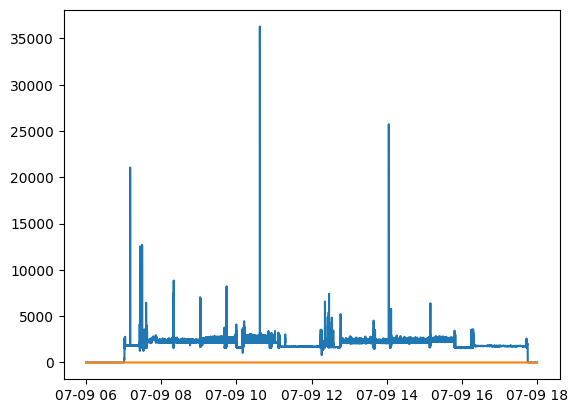

In [5]:
plt.figure()
plt.plot(measure)
plt.show()

# pd.date_range(start=  ,  end=  )

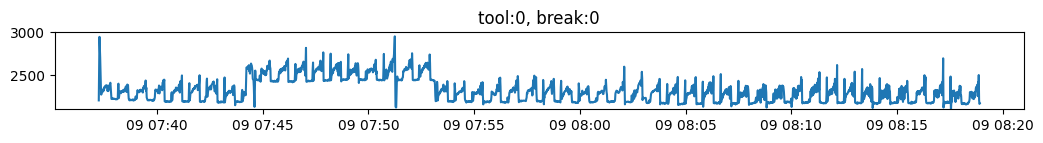

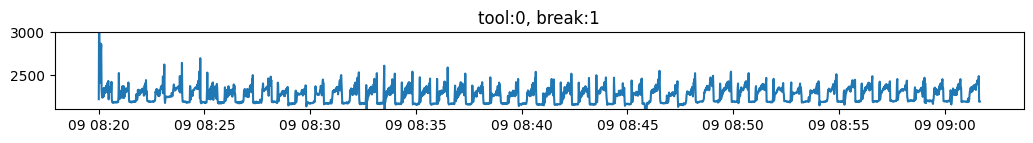

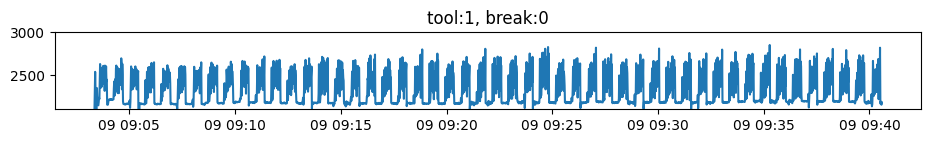

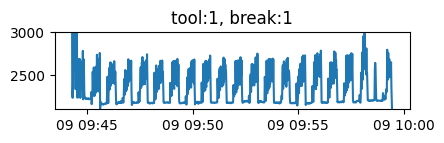

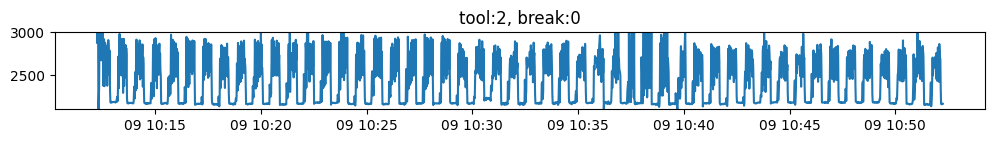

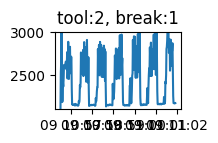

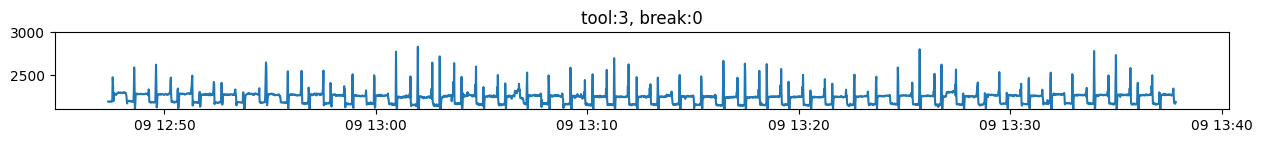

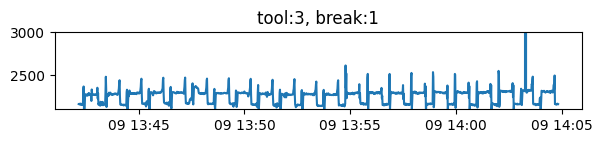

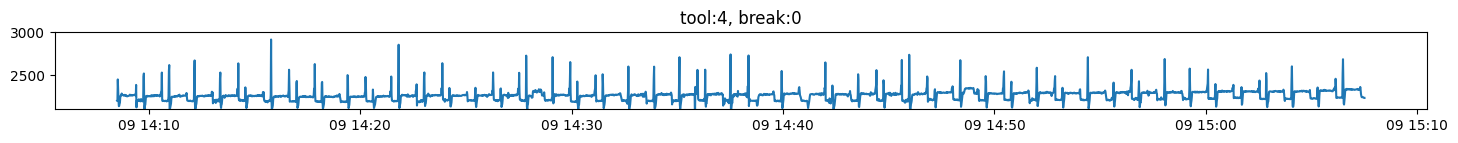

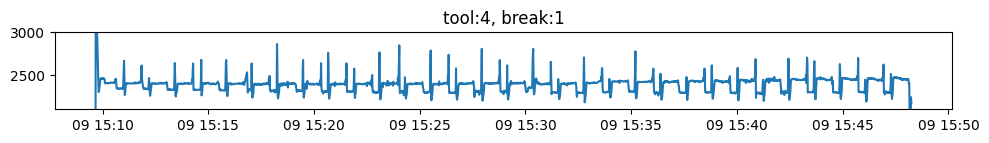

In [6]:
for process in history.values:
    drange = pd.date_range(start=process[0], end=process[1], freq='s')

    plt.figure(figsize=(len(drange)/200, 1))
    plt.plot(measure.loc[process[0]:process[1], 'powe'])
    plt.ylim(2100, 3000)
    plt.title(f'tool:{process[-1]}, break:{process[2]}')
    plt.show()

- 윈도우가 겹치지 않게 잘 끊어주어야 함
- 종류별로 train, test 에 들어가야 함
- 앞뒤로 나누면 안 된다. 골고루 train, test 해야 함
- tslearn.preprocessing 시계열 전처리

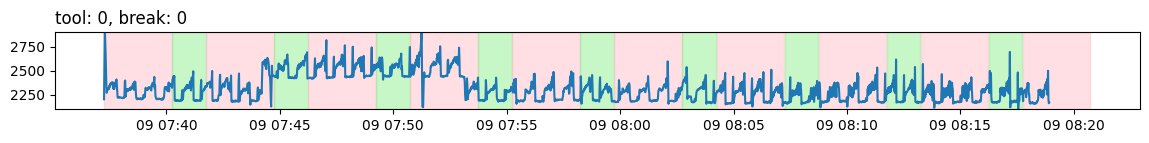

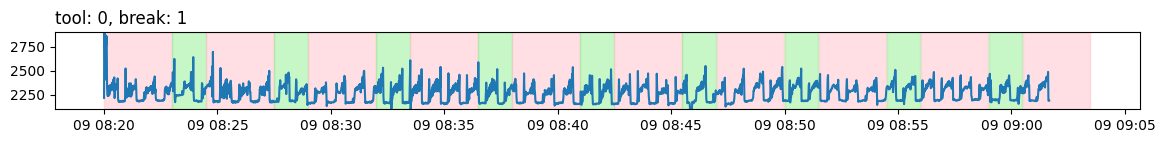

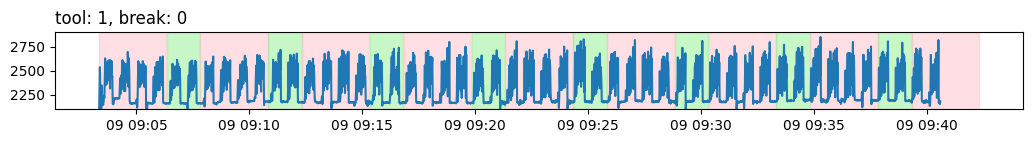

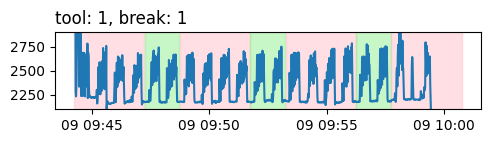

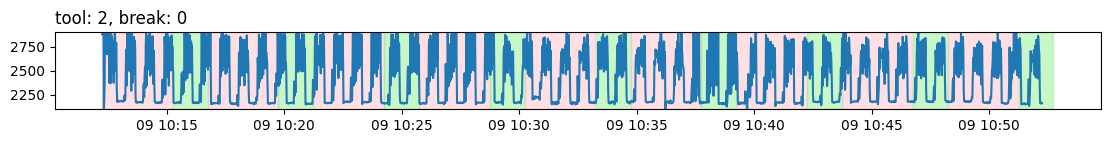

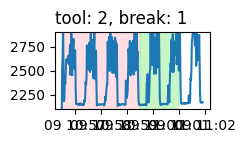

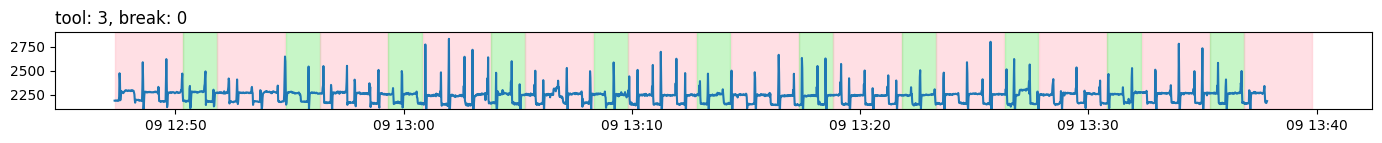

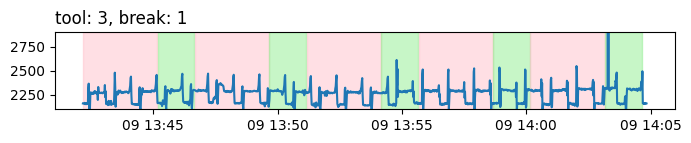

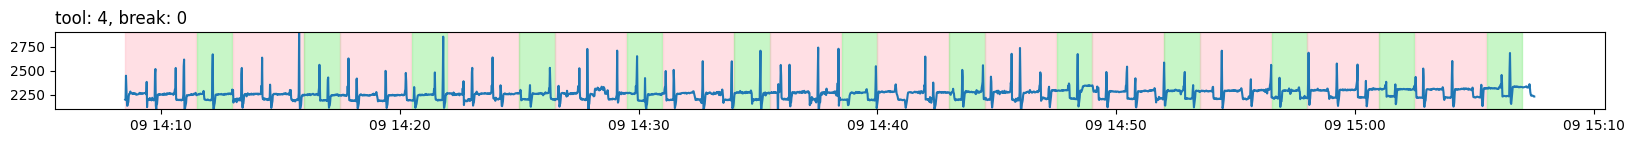

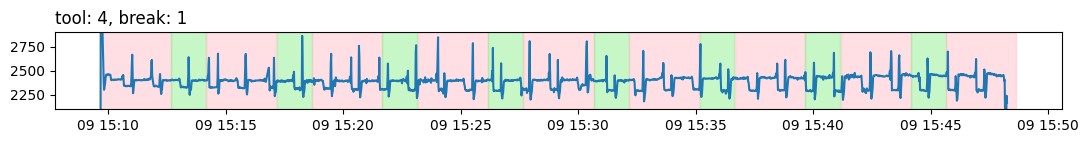

In [7]:
seq_len = 60
n_channels = 2

split_size = '90s'
train_range = pd.Timedelta('179s')
test_range = pd.Timedelta('89s')
data_size = pd.Timedelta(f'{seq_len-1}s')
stride_size = '1s'

x_train = np.empty((0, seq_len, n_channels))
y_train = np.empty((0,))
x_test = np.empty((0, seq_len, n_channels))
y_test = np.empty((0,))

for process in history.values: # 각 공정마다
    splitter = pd.date_range(start=process[0], end=process[1], freq=split_size)
    
    plt.figure(figsize=(len(splitter)/2, 1))
    
    for i, spl in enumerate(splitter):
        if spl+data_size <= pd.to_datetime(process[1]):
            if i%3 == 0: # 훈련세트
                plt.axvspan(spl, spl+train_range, color='pink', alpha=0.5)
                
                separator = pd.date_range(start=spl, end=spl+train_range, freq=stride_size)
                for sep in separator: # stride size씩 이동하며 추출
                    if sep+data_size <= spl+train_range:
                        x_train = np.append(x_train, measure[sep:sep+data_size].values.reshape(1, seq_len, n_channels), axis=0)
                        y_train = np.append(y_train, [process[2]], axis=0)
            elif i%3 == 2: # 테스트세트
                plt.axvspan(spl, spl+test_range, color='lightgreen', alpha=0.5)
                
                separator = pd.date_range(start=spl, end=spl+test_range, freq=stride_size)
                for sep in separator: # stride size씩 이동하며 추출
                    if sep+data_size <= spl+test_range:
                        x_test = np.append(x_test, measure[sep:sep+data_size].values.reshape(1, seq_len, n_channels), axis=0)
                        y_test = np.append(y_test, [process[2]], axis=0)
                        
    plt.plot(measure.loc[process[0]:process[1], 'powe'])
    plt.ylim(2100, 2900)
    plt.title("tool: {}, break: {}".format(process[3], process[2]), loc='left')
    plt.show()

In [8]:
# # tool 2, break 1 에서 test데이터가 없음. 그래서 수정해야 함

# seq_len = 90
# n_channels = 2

# split_size = '120s'
# train_range = pd.Timedelta('239s')
# test_range = pd.Timedelta('119s')
# data_size = pd.Timedelta(f'{seq_len-1}s')
# stride_size = '1s'

# x_train = np.empty((0, seq_len, n_channels))
# y_train = np.empty((0,))
# x_test = np.empty((0, seq_len, n_channels))
# y_test = np.empty((0,))

# for process in history.values: # 각 공정마다
#     splitter = pd.date_range(start=process[0], end=process[1], freq=split_size)
    
#     plt.figure(figsize=(len(splitter)/2, 1))
    
#     for i, spl in enumerate(splitter):
#         if spl+data_size <= pd.to_datetime(process[1]):
#             if i%3 == 0: # 훈련세트
#                 plt.axvspan(spl, spl+train_range, color='pink', alpha=0.5)
                
#                 separator = pd.date_range(start=spl, end=spl+train_range, freq=stride_size)
#                 for sep in separator: # stride size씩 이동하며 추출
#                     if sep+data_size <= spl+train_range:
#                         x_train = np.append(x_train, measure[sep:sep+data_size].values.reshape(1, seq_len, n_channels), axis=0)
#                         y_train = np.append(y_train, [process[2]], axis=0)
#             elif i%3 == 2: # 테스트세트
#                 plt.axvspan(spl, spl+test_range, color='lightgreen', alpha=0.5)
                
#                 separator = pd.date_range(start=spl, end=spl+test_range, freq=stride_size)
#                 for sep in separator: # stride size씩 이동하며 추출
#                     if sep+data_size <= spl+test_range:
#                         x_test = np.append(x_test, measure[sep:sep+data_size].values.reshape(1, seq_len, n_channels), axis=0)
#                         y_test = np.append(y_test, [process[2]], axis=0)
                        
#     plt.plot(measure.loc[process[0]:process[1], 'powe'])
#     plt.ylim(2100, 2900)
#     plt.title("tool: {}, break: {}".format(process[3], process[2]), loc='left')
#     plt.show()

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(9922, 60, 2) (9922,)
(2356, 60, 2) (2356,)


- 분할 전에 스케일링 하는 방법(0은 가동x 상태인데 0부터 35000까지 스케일링하면 손실되는 정보가 많게 됨)

In [10]:
from sklearn.preprocessing import StandardScaler

# 일렬로 펴서 스케일링하고 다시 원래대로
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train.reshape(-1,n_channels)).reshape(-1, seq_len, n_channels)
x_test_sc = scaler.transform(x_test.reshape(-1,n_channels)).reshape(-1, seq_len, n_channels)

In [11]:
x_train_sc.shape

(9922, 60, 2)

# 중요 정석  
  
- 초반에는 필터 개수는 적고, 필터 크기는 길게 해놓은 다음에
- 점점 쌓을수록 필터 개수는 늘려가고, 필터 크기는 줄여가는 것이 가장 효율적
- 필터의 개수만 2의 제곱수
- 필터의 크기는 자유롭게
- strides를 다 1로 하든, 처음에는 크게 하고 갈수록 줄여가는 것이 좋음(필터의 크기를 넘으면 안 됨)
- 필터 크기 줄여주면 strides도 줄여주는 것이 좋음
- GlobalMaxPooling1D을 하면 직전 body의 필터 개수가 나옴
- 드롭아웃은 예외적으로 Activation 뒤에 와야 성능이 더 좋음

In [12]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

inputs = layers.Input(shape=(seq_len, n_channels))

# Body
x = layers.Conv1D(32, 10, padding='same', strides=2)(inputs)
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)

x = layers.Conv1D(64, 5, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)

x = layers.Conv1D(64, 5, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)

# Neck
x = layers.GlobalMaxPooling1D()(x)

# Header
x = layers.Dense(32)(x) # 바로 activation하지말고 아래와 같이 하는 것이 성능 더 좋음
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32)(x) # 바로 activation하지말고 아래와 같이 하는 것이 성능 더 좋음
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 2)]           0         
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            672       
                                                                 
 batch_normalization (Batch  (None, 30, 32)            128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 30, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 64)            10304     
                                                                 
 batch_normalization_1 (Bat  (None, 30, 64)            256       
 chNormalization)                                            

In [13]:
es_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train_sc, y_train, validation_split=0.2, batch_size=128, epochs=300, callbacks=[es_callback])

Epoch 1/300
63/63 [==============================] - 3s 15ms/step - loss: 0.4500 - acc: 0.8171 - val_loss: 0.6290 - val_acc: 0.8736
Epoch 2/300
63/63 [==============================] - 1s 12ms/step - loss: 0.2455 - acc: 0.9224 - val_loss: 0.4009 - val_acc: 0.9824
Epoch 3/300
63/63 [==============================] - 1s 13ms/step - loss: 0.1729 - acc: 0.9447 - val_loss: 0.2964 - val_acc: 0.9542
Epoch 4/300
63/63 [==============================] - 1s 13ms/step - loss: 0.1268 - acc: 0.9593 - val_loss: 0.3899 - val_acc: 0.7592
Epoch 5/300
63/63 [==============================] - 1s 12ms/step - loss: 0.0941 - acc: 0.9733 - val_loss: 0.2972 - val_acc: 0.8710
Epoch 6/300
63/63 [==============================] - 1s 13ms/step - loss: 0.0716 - acc: 0.9786 - val_loss: 1.2705 - val_acc: 0.4927
Epoch 7/300
63/63 [==============================] - 1s 13ms/step - loss: 0.0711 - acc: 0.9776 - val_loss: 1.4151 - val_acc: 0.4861
Epoch 8/300
63/63 [==============================] - 1s 13ms/step - loss: 0.

In [14]:
p_test = model.predict(x_test_sc)
p_test

74/74 [==============================] - 0s 2ms/step


array([[0.00439808],
       [0.00450442],
       [0.00328791],
       ...,
       [0.9273289 ],
       [0.9515953 ],
       [0.87086964]], dtype=float32)

정확도 : 0.9460950764006791
f1 : 0.9242695289206917


<Figure size 640x480 with 0 Axes>

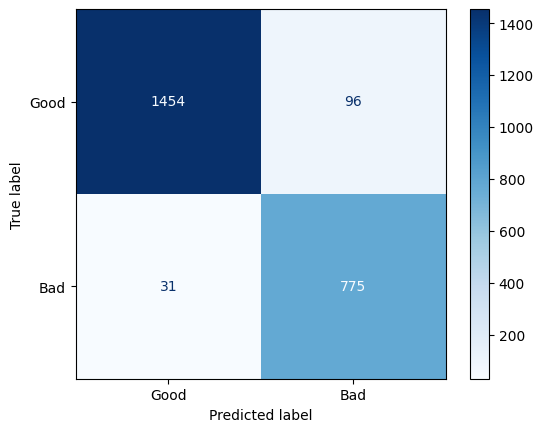

In [15]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

p_test_bin = p_test>=0.5

print('정확도 :', accuracy_score(y_test, p_test_bin))
print('f1 :', f1_score(y_test, p_test_bin))

plt.figure()
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, p_test_bin), display_labels=['Good', 'Bad']).plot(cmap='Blues')
plt.show()


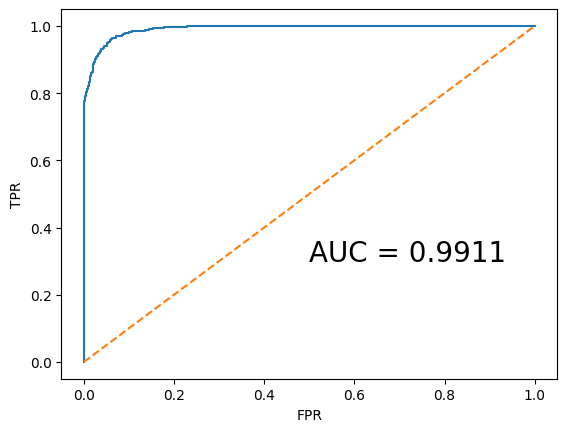

In [16]:
fpr, tpr, _ = roc_curve(y_test, p_test)
auc = roc_auc_score(y_test, p_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()